In [26]:
import matplotlib.pyplot as plt
import  os
import pandas as pd
import seaborn as sns
import sys
sys.path.insert(0, './utils')
from sql_connection import Connector

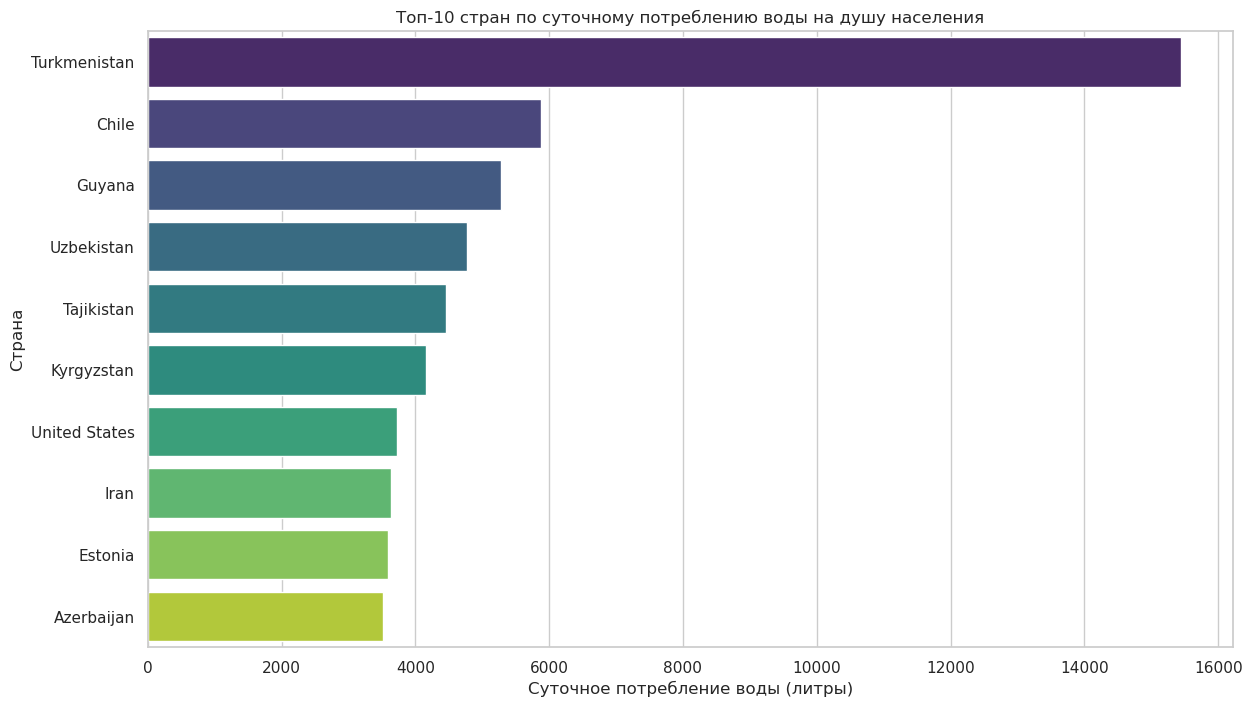

In [27]:
db_name = 'water_usage.db'

# Создание экземпляра класса Connector и подключение к базе данных
connector = Connector(db_name)
connector.connect()
query = '''SELECT * FROM water_usage'''
data = connector.execute_query(query)
columns = ['Country', 'yearly_water_used(m3)', 'daily_water_used_per_capita(l)', 'Population']
df = pd.DataFrame(data, columns=columns)

if not os.path.exists('public'):
    os.makedirs('public')

# Установим стиль графиков
sns.set(style="whitegrid")

top_countries = df.sort_values('daily_water_used_per_capita(l)', ascending=False).head(10)
# Построим график
plt.figure(figsize=(14, 8))
sns.barplot(x='daily_water_used_per_capita(l)', y='Country', data=top_countries, palette='viridis', hue='Country')
plt.title('Топ-10 стран по суточному потреблению воды на душу населения')
plt.xlabel('Суточное потребление воды (литры)')
plt.ylabel('Страна')
# Сохранение графика
plt.savefig('public/top_10_water_usage_daily.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

    
# Закрытие соединения
connector.close()


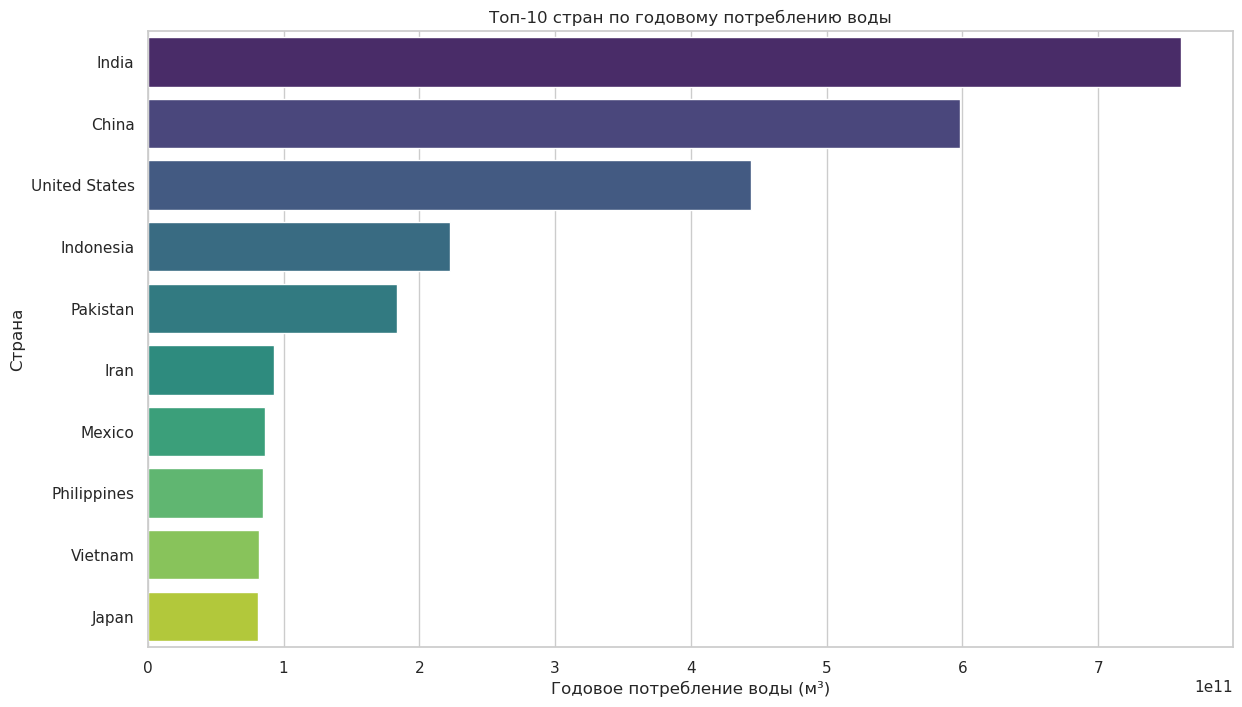

In [28]:
top_countries = df.sort_values('yearly_water_used(m3)', ascending=False).head(10)

plt.figure(figsize=(14, 8))
sns.barplot(x='yearly_water_used(m3)', y='Country', data=top_countries, palette='viridis', hue='Country')
plt.title('Топ-10 стран по годовому потреблению воды')
plt.xlabel('Годовое потребление воды (м³)')
plt.ylabel('Страна')
plt.savefig('public/top_10_water_usage_yearly.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

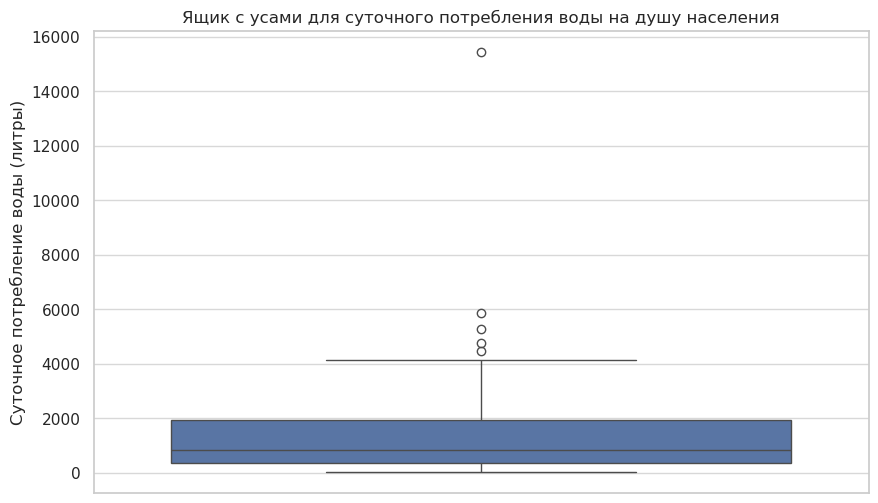

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(y='daily_water_used_per_capita(l)', data=df)
plt.title('Ящик с усами для суточного потребления воды на душу населения')
plt.ylabel('Суточное потребление воды (литры)')
plt.grid(axis='y', alpha=0.75)
plt.savefig('public/boxplot_for_daily_water_consumption.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

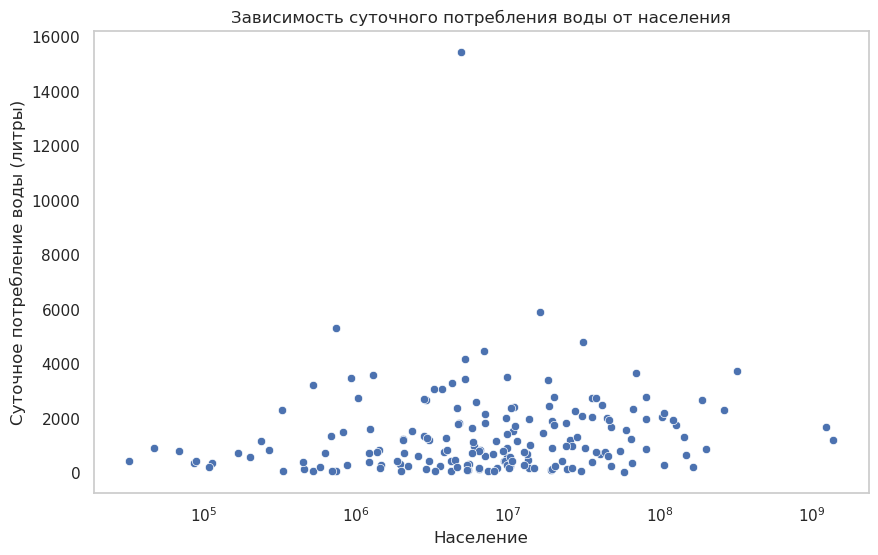

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Population', y='daily_water_used_per_capita(l)', data=df)
plt.title('Зависимость суточного потребления воды от населения')
plt.xlabel('Население')
plt.ylabel('Суточное потребление воды (литры)')
plt.xscale('log')  # Логарифмическая шкала для населения
plt.grid()
# Сохранение графика
plt.savefig('public/dependence_of_daily_water_consumption.png', format='png', dpi=300, bbox_inches='tight')
plt.show()